In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit.circuit import Delay

import sys
import os

sys.path.append(os.path.abspath("..\\..\\..\\.."))
from metrics.IBM.get_calibration_data import get_calibration_data, get_best_qubits



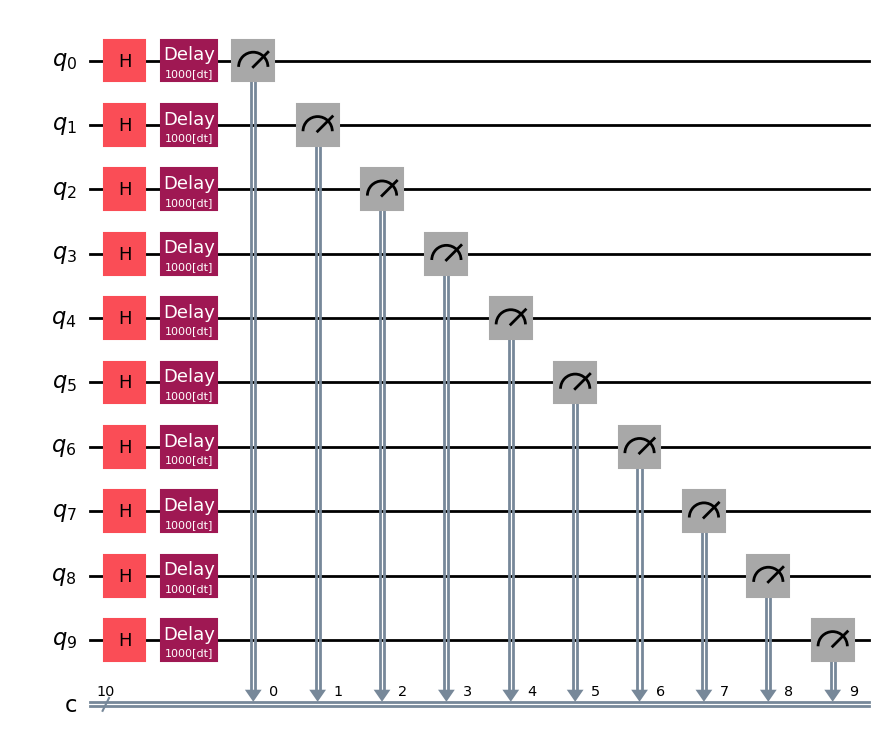

In [3]:
def load_circuit(delay, qb_len=1):
    qc = QuantumCircuit(qb_len, qb_len)

    qc.h(range(qb_len)) # estado inicial +
    for i in range(qb_len):
        qc.append(Delay(delay), [i])
    qc.measure(range(qb_len), range(qb_len))

    return qc

qc = load_circuit(1000, 10)
qc.draw('mpl')



In [4]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_brisbane")
data_csv = 'ibm_brisbane_calibrations_2024-12-14T21_59_06Z.csv'

In [5]:
best_T2_qubits = get_best_qubits(data_csv, lambda x: x.T2, 10)
print(*[f"{q.Qubit}, T2={round(q.T2, 3)}" for q in best_T2_qubits], sep= '\n')

29, T2=363.502
71, T2=359.006
73, T2=344.096
17, T2=316.846
3, T2=305.379
1, T2=299.468
25, T2=291.08
10, T2=281.54
27, T2=271.817
32, T2=265.338


In [6]:
isa_circuit = transpile(qc, backend, scheduling_method="asap", optimization_level=3, initial_layout=[q.Qubit for q in best_T2_qubits])
print(f"Circuit Depth: {qc.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')

Circuit Depth: 3
Transpiled Circuit Depth: 5


In [7]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.5 ns


In [8]:
t_array = [0, 40_000, 80_000, 120_000, 160_000, 200_000, 240_000, 280_000, 320_000, 360_000, 400_000,
           440_000, 480_000, 520_000, 560_000, 600_000, 640_000, 680_000, 720_000, 760_000, 800_000]
circuits = []

for t in t_array:

    qc = load_circuit(t, qb_len=10)

    isa_circuit = transpile(qc, backend, scheduling_method="asap", optimization_level=3, initial_layout=[q.Qubit for q in best_T2_qubits])
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} μs")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
    # c.draw(output='mpl')

Circuit Depth: 4
Delay Duration: 0.0 μs
Total Duration: 1.36 μs

Circuit Depth: 5
Delay Duration: 20.0 μs
Total Duration: 21.36 μs

Circuit Depth: 5
Delay Duration: 40.0 μs
Total Duration: 41.36 μs

Circuit Depth: 5
Delay Duration: 60.0 μs
Total Duration: 61.36 μs

Circuit Depth: 5
Delay Duration: 80.0 μs
Total Duration: 81.36 μs

Circuit Depth: 5
Delay Duration: 100.0 μs
Total Duration: 101.36 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: De

Circuit Depth: 5
Delay Duration: 120.0 μs
Total Duration: 121.36 μs

Circuit Depth: 5
Delay Duration: 140.0 μs
Total Duration: 141.36 μs

Circuit Depth: 5
Delay Duration: 160.0 μs
Total Duration: 161.36 μs

Circuit Depth: 5
Delay Duration: 180.0 μs
Total Duration: 181.36 μs

Circuit Depth: 5
Delay Duration: 200.0 μs
Total Duration: 201.36 μs

Circuit Depth: 5
Delay Duration: 220.0 μs
Total Duration: 221.36 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: De

Circuit Depth: 5
Delay Duration: 240.0 μs
Total Duration: 241.36 μs

Circuit Depth: 5
Delay Duration: 260.0 μs
Total Duration: 261.36 μs

Circuit Depth: 5
Delay Duration: 280.0 μs
Total Duration: 281.36 μs

Circuit Depth: 5
Delay Duration: 300.0 μs
Total Duration: 301.36 μs

Circuit Depth: 5
Delay Duration: 320.0 μs
Total Duration: 321.36 μs

Circuit Depth: 5
Delay Duration: 340.0 μs
Total Duration: 341.36 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: De

Circuit Depth: 5
Delay Duration: 360.0 μs
Total Duration: 361.36 μs

Circuit Depth: 5
Delay Duration: 380.0 μs
Total Duration: 381.36 μs

Circuit Depth: 5
Delay Duration: 400.0 μs
Total Duration: 401.36 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_40952\1936952937.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


In [9]:
def get_layout(circuit, qb_len=1):
    layout = circuit._layout.initial_layout.get_virtual_bits()
    print(layout)
    keys = [layout[i] for i in layout]
    return keys[:qb_len]

# for c in circuits:
#     get_layout(c, qb_len=10)

data_qubits, data_edges = get_calibration_data(data_csv)

layout = get_layout(circuits[0], qb_len=10)

print(layout)

{Qubit(QuantumRegister(10, 'q'), 0): 29, Qubit(QuantumRegister(10, 'q'), 1): 71, Qubit(QuantumRegister(10, 'q'), 2): 73, Qubit(QuantumRegister(10, 'q'), 3): 17, Qubit(QuantumRegister(10, 'q'), 4): 3, Qubit(QuantumRegister(10, 'q'), 5): 1, Qubit(QuantumRegister(10, 'q'), 6): 25, Qubit(QuantumRegister(10, 'q'), 7): 10, Qubit(QuantumRegister(10, 'q'), 8): 27, Qubit(QuantumRegister(10, 'q'), 9): 32, Qubit(QuantumRegister(117, 'ancilla'), 0): 0, Qubit(QuantumRegister(117, 'ancilla'), 1): 2, Qubit(QuantumRegister(117, 'ancilla'), 2): 4, Qubit(QuantumRegister(117, 'ancilla'), 3): 5, Qubit(QuantumRegister(117, 'ancilla'), 4): 6, Qubit(QuantumRegister(117, 'ancilla'), 5): 7, Qubit(QuantumRegister(117, 'ancilla'), 6): 8, Qubit(QuantumRegister(117, 'ancilla'), 7): 9, Qubit(QuantumRegister(117, 'ancilla'), 8): 11, Qubit(QuantumRegister(117, 'ancilla'), 9): 12, Qubit(QuantumRegister(117, 'ancilla'), 10): 13, Qubit(QuantumRegister(117, 'ancilla'), 11): 14, Qubit(QuantumRegister(117, 'ancilla'), 12):

In [10]:
sampler = SamplerV2(backend=backend)
shots = 100
# job = sampler.run(circuits, shots=shots)
job = service.job('cxf20nt3ej4g008fzee0')
pub_result = job.result()

In [11]:
import numpy as np

# print("error rate:")

results = []

for i in range(len(t_array)):
    result = pub_result[i]
    meas = result['__value__']['data']['c'].get_counts()
    
    qubit_results = {}

    # print(f"@ {t_array[i]*dt/1000}us")

    for q in range(10):
        qubit_results[q] = {
            '0': np.sum([meas[r] for r in meas if r[9-q] == '0']),
            '1': np.sum([meas[r] for r in meas if r[9-q] == '1']),
        }

    # print(*[f"\t {round(qubit_results[q]['1'])}%" for q in range(10)])

    results.append(qubit_results)

    # print(qubit_results)

    

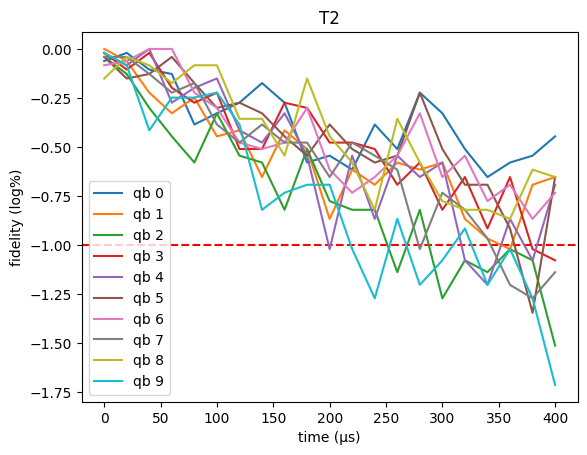

In [31]:
import matplotlib.pyplot as plt
import math

# Example data arrays
x = [t*dt/1000 for t in t_array]
# y = [[shots - abs(shots - 2*r[q]['0']) for r in results] for q in range(10)]
# y = [[r[q]['1'] for r in results] for q in range(10)]
y = [[np.log(1 - abs(shots - 2*r[q]['0'])/shots) for r in results] for q in range(10)]
# y = [[r[q]['0'] for r in results] for q in range(10)]

plt.axhline(y=-1, color='r', linestyle='--')

# Create the plot
for q in range(10):
    plt.plot(x, y[q], label=f'qb {q}')

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('fidelity (log%)')
plt.title('T2')
plt.legend()

# Display the plot
plt.show()

T2

In [32]:

print(f"qubit \t | T2 estimation (μs) \t | T2 by IBM data (μs) \t | variation")
print("----------------------------------------------------------------------------")

for q in range(10):

    # log_y = [np.log(y_t) for y_t in y[q]]
    log_y = y[q]

    T2 = - np.sum([x_i**2 for x_i in x]) / np.sum([x[i]*log_y[i] for i in range(len(x))])
    T2_std = np.sqrt(1/len(x) * np.sum([(-x[i]/T2 - log_y[i])**2 for i in range(len(x))]))
    T2_data = data_qubits[layout[q]].T2

    print(f"{q}->{layout[q]} \t | {round(T2, 2)} \t\t | {round(T2_data, 2)} \t\t | {round((T2/T2_data-1)*100)}%")
    print("----------------------------------------------------------------------------")


qubit 	 | T2 estimation (μs) 	 | T2 by IBM data (μs) 	 | variation
----------------------------------------------------------------------------
0->29 	 | 606.58 		 | 363.5 		 | 67%
----------------------------------------------------------------------------
1->71 	 | 400.53 		 | 359.01 		 | 12%
----------------------------------------------------------------------------
2->73 	 | 283.64 		 | 344.1 		 | -18%
----------------------------------------------------------------------------
3->17 	 | 413.22 		 | 316.85 		 | 30%
----------------------------------------------------------------------------
4->3 	 | 370.13 		 | 305.38 		 | 21%
----------------------------------------------------------------------------
5->1 	 | 450.22 		 | 299.47 		 | 50%
----------------------------------------------------------------------------
6->25 	 | 460.8 		 | 291.08 		 | 58%
----------------------------------------------------------------------------
7->10 	 | 343.35 		 | 281.54 		 | 22%
-----------------

In [14]:

# Example data arrays
# x = [t*dt/1000 for t in t_array]
# y = [100*math.exp(-x/160) for x in x]


# # plt.axhline(y=(1-1/math.e)*100, color='r', linestyle='--')

# # Create the plot
# plt.plot(x, y)

# # Add labels and title
# plt.xlabel('time (us)')
# plt.ylabel('fidelity (%)')
# plt.title('T2')

# # Display the plot
# plt.show()